# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy



### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 565


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:

#Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="
# Define an empty list to fetch the weather data for each city
city_data = []
name=[]         # list for city name
cloud=[]        # list for cloudines
ctry=[]         # list for country
date=[]         # list for date
humi=[]         # list for humidity
lat=[]          # list for latitude
lng=[]          # list for longitude
maxtemp=[]      # list for max temperature
wind=[]         # list for wind speed


# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

# Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]
        
        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

           
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saint-louis
Processing Record 2 of Set 1 | ushuaia
Processing Record 3 of Set 1 | faya-largeau
Processing Record 4 of Set 1 | harnosand
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | batesville
Processing Record 7 of Set 1 | vila franca do campo
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | santo antonio do amparo
Processing Record 10 of Set 1 | isafjordur
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | colchani
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | port-vila
Processing Record 16 of Set 1 | weno
Processing Record 17 of Set 1 | ribeira grande
Processing Record 18 of Set 1 | tiksi
Processing Record 19 of Set 1 | adamstown
Processing Record 20 of Set 1 | hermanus
Processing Record 21 of Set 1 | tazovsky
Processing Record 22 of Set 1 | ust-

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = {
    'City': name,
    'Country': ctry,
    'Date': date,
    'Lat': lat,
    'Lng': lng,
    'Cloudiness': cloud,
    'Humidity': humi,
    'Max Temp': maxtemp,
    'Wind Speed': wind
}

city_data_df = pd.DataFrame(city_data)


# Show Record Count
city_data_df.count()

City          548
Lat           548
Lng           548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Country       548
Date          548
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,saint-louis,16.3333,-15.0000,98.17,26,5,3.51,SN,1697659249
1,ushuaia,-54.8000,-68.3000,60.46,42,0,16.11,AR,1697659223
2,faya-largeau,17.9257,19.1043,83.48,18,72,13.02,TD,1697659249
3,harnosand,62.6323,17.9379,32.00,88,6,6.67,SE,1697659250
4,port-aux-francais,-49.3500,70.2167,38.59,97,100,19.26,TF,1697659250


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,saint-louis,16.3333,-15.0000,98.17,26,5,3.51,SN,1697659249
1,ushuaia,-54.8000,-68.3000,60.46,42,0,16.11,AR,1697659223
2,faya-largeau,17.9257,19.1043,83.48,18,72,13.02,TD,1697659249
3,harnosand,62.6323,17.9379,32.00,88,6,6.67,SE,1697659250
4,port-aux-francais,-49.3500,70.2167,38.59,97,100,19.26,TF,1697659250


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

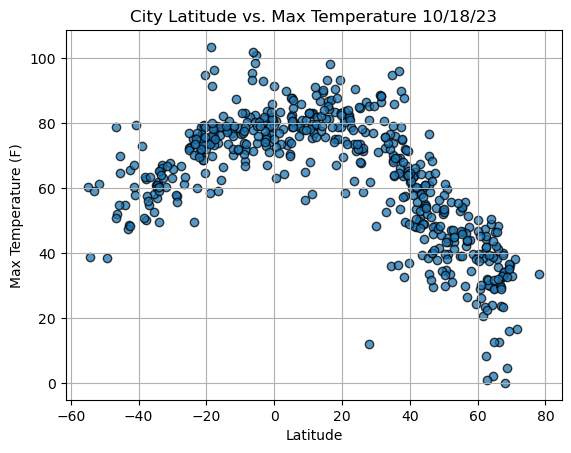

In [8]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.75, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("output_data/Fig1.png")

# Show plot.
plt.show()


#### Latitude Vs. Humidity

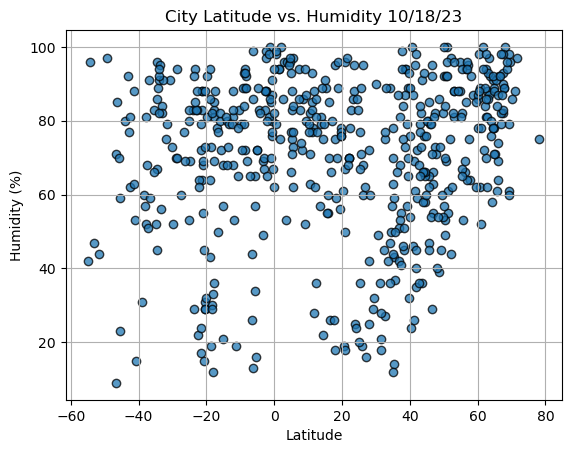

In [9]:
# Build the scatter plots for latitude vs. humidity

plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.75, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("output_data/Fig2.png")
# Show plot.
plt.show()


#### Latitude Vs. Cloudiness

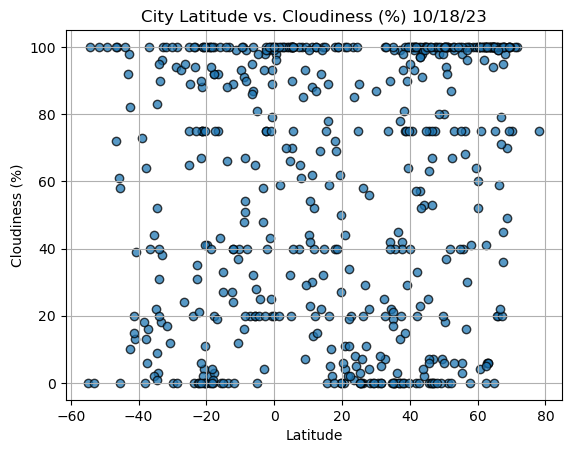

In [10]:
# Build the scatter plots for latitude vs. cloudiness

plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.75, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

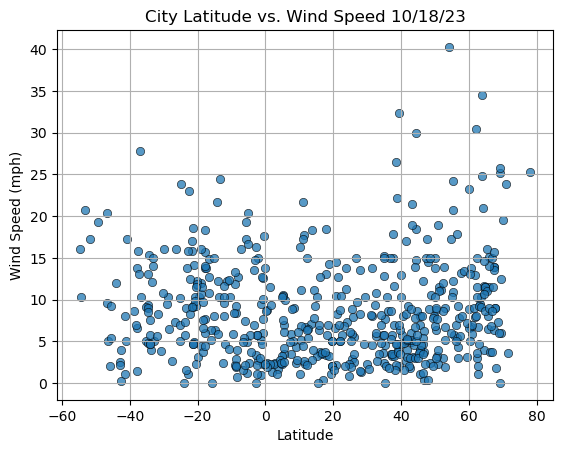

In [11]:
# Build the scatter plots for latitude vs. wind speed

plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=0.5, marker="o",
            alpha=0.75, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


###  Temperature vs. Latitude Linear Regression Plot

In [12]:
# Linear regression on Northern Hemisphere
weather_data_north = city_data_df[city_data_df['Lat'] >= 0]

weather_data_north.count()


City          361
Lat           361
Lng           361
Max Temp      361
Humidity      361
Cloudiness    361
Wind Speed    361
Country       361
Date          361
dtype: int64

In [13]:
# Linear regression on Southern Hemisphere
weather_data_south = city_data_df[city_data_df['Lat'] < 0]

weather_data_south.count()

City          187
Lat           187
Lng           187
Max Temp      187
Humidity      187
Cloudiness    187
Wind Speed    187
Country       183
Date          187
dtype: int64

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
These plots indicate a very weak correlation between Latitude and Humidity,
for both the Northern and Southern Hemispheres. With correlation coefficients 
of .227 and .136, both hemispheres show only very weak positive correlation.
We can also see on the scatterplots that the shape of the data does not have 
any particularly strong linear relationship, mostly being a wide spread on both
dimensions with no trend. The regression lines both have very small slopes, with
 .26 and .2 respectively, indicating that the Latitude of a city is not very good
 at predicting change in humidity of that city, and the regression lines on the 
 plot don't seem to match up with the spread or trend of the data in any meaningful way.

The r-value is: -0.8340771357822979


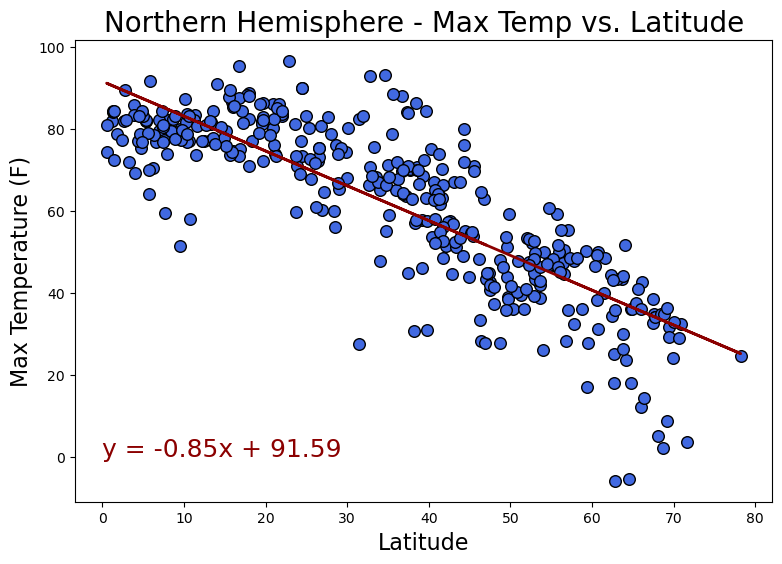

In [ ]:
# Northern Hemisphere - Max Temp vs. Latitude Linear Regression
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0, 0), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_North.png')

# Show plot:
plt.show()

The r-value is: 0.7645858722879917


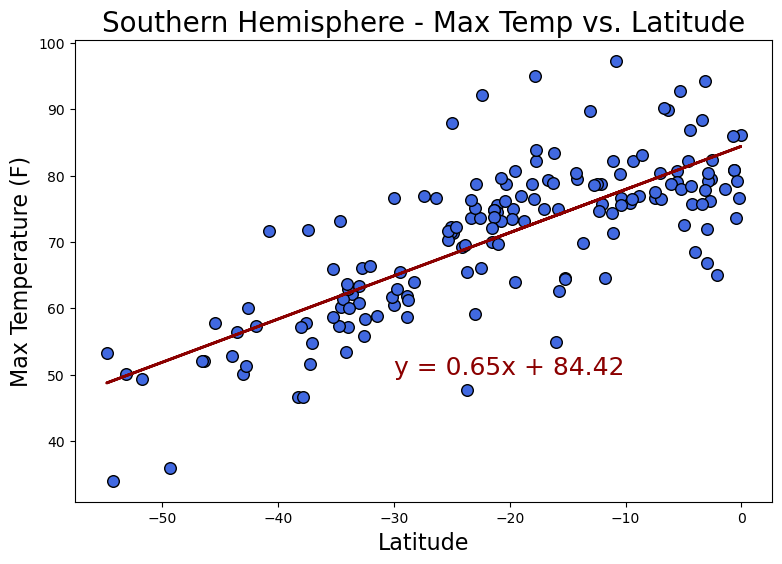

In [ ]:
# Southern Hemisphere - Max Temp vs. Latitude Linear Regression

# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Max Temp']

# Perform a linear regression for temperature vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq2 = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values, 'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Max Temp vs. Latitude', fontsize=20)
plt.ylabel('Max Temperature (F)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq2,(-30, 50),fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. MaxTemp_South.png')

# Show plot:
plt.show()

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.03696775848292961


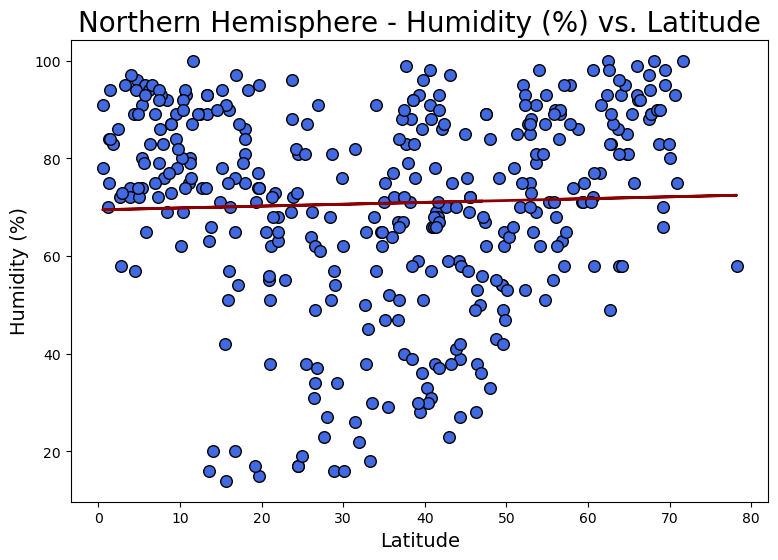

In [ ]:
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=14, color='black')
plt.xlabel('Latitude', fontsize=14, color='black')
plt.annotate(line_eq,(51,6),fontsize=14, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_North.png')

# Show plot:
plt.show()

The r-value is: 0.11330579116397894


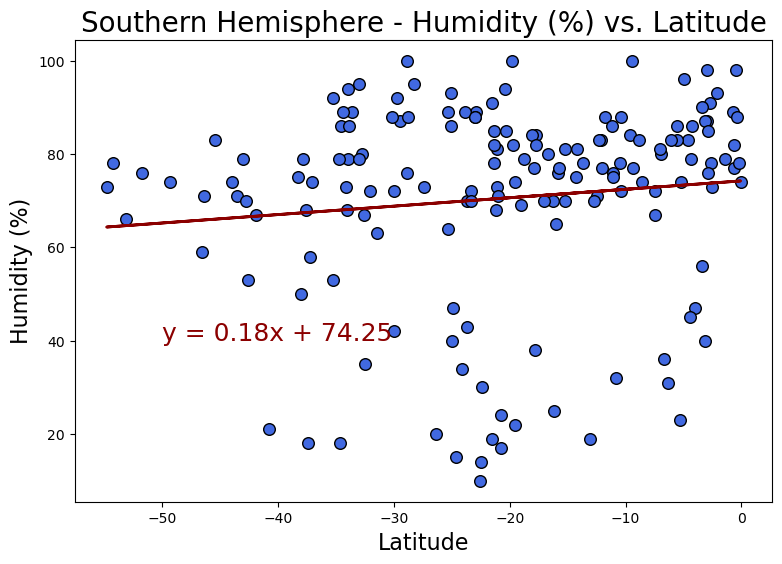

In [ ]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Humidity']

# Perform a linear regression for humidity vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude', fontsize=20)
plt.ylabel('Humidity (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-50,40), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Humidity_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10669306577781265


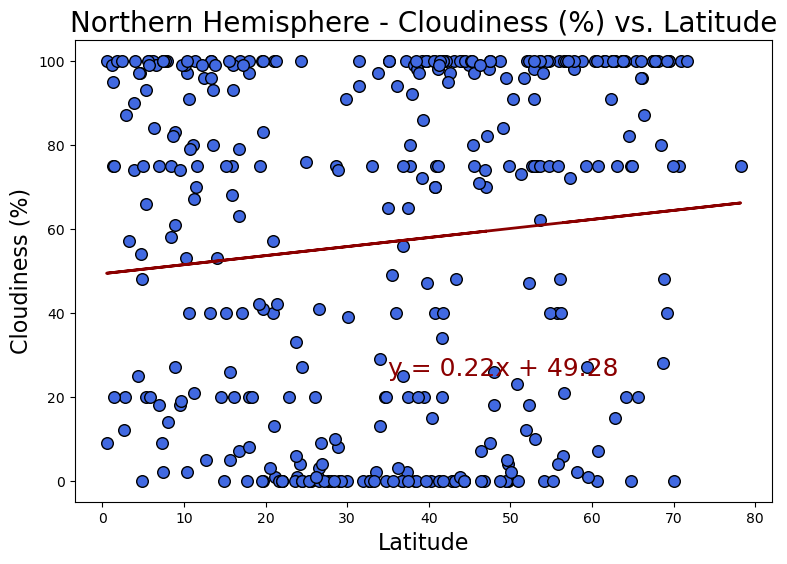

In [ ]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(35,25), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_North.png')

# Show plot:
plt.show()

The r-value is: 0.21662209290968623


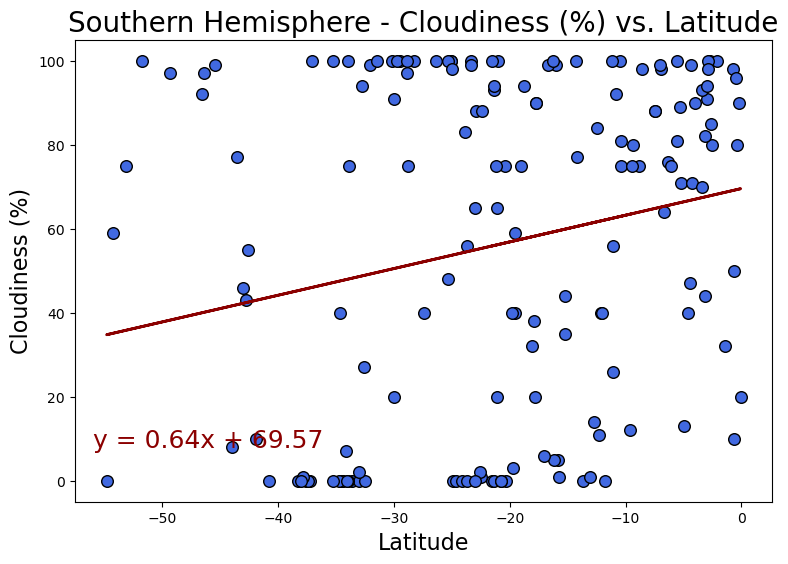

In [ ]:
# Southern Hemisphere
# build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Cloudiness']

# Perform a linear regression for cloudiness vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude', fontsize=20)
plt.ylabel('Cloudiness (%)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-56,8), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Cloudiness_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.18298017651141812


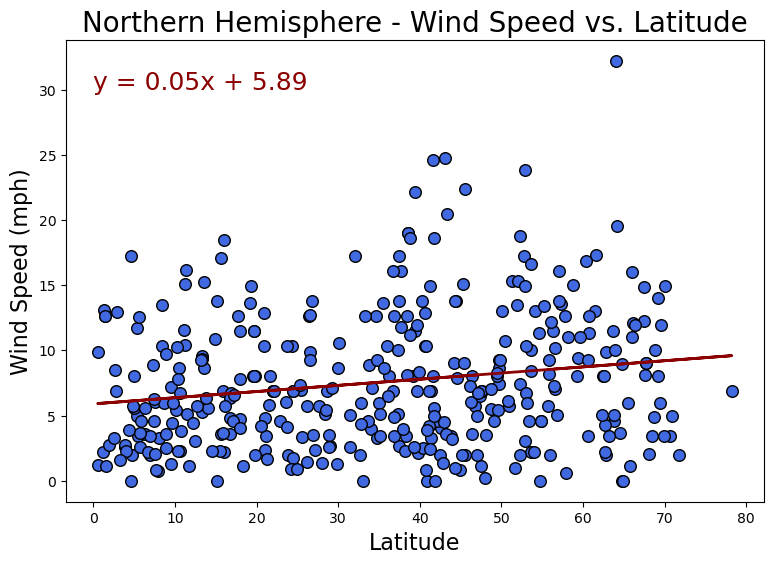

In [ ]:
# Northern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_north['Lat']
y_values = weather_data_north['Wind Speed']

# Perform a linear regression for wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Northern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(0,30), fontsize=18, color='darkred')
#plt.grid(False)



# Print r-squared value:
print(f'The r-value is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_North.png')

# Show plot:
plt.show()

The r-squared is: -0.18598989828728205


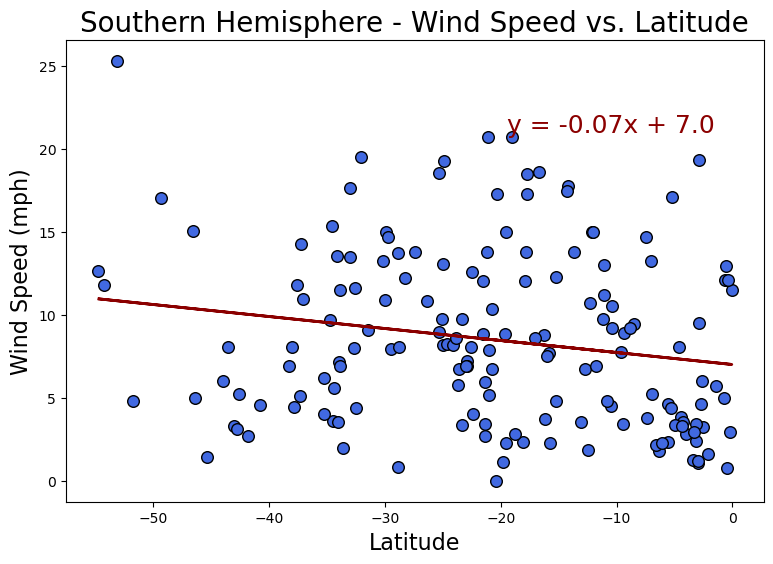

In [ ]:
# Southern Hemisphere
# Build scatter plot for each data type:
plt.figure(figsize=(9,6))
x_values = weather_data_south['Lat']
y_values = weather_data_south['Wind Speed']

# Perform a linear regression on wind speed vs. latitude:
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

# Get regression values:
regress_values = x_values * slope + intercept

# Create line equation string:
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

# Create plot:
plt.scatter(x_values,y_values, marker='o', color='royalblue', s=[70], edgecolors='black')
plt.plot(x_values,regress_values,'darkred', linewidth=2)

# Incorporate the other graph properties:
plt.title('Southern Hemisphere - Wind Speed vs. Latitude', fontsize=20)
plt.ylabel('Wind Speed (mph)', fontsize=16, color='black')
plt.xlabel('Latitude', fontsize=16, color='black')
plt.annotate(line_eq,(-19.5,21), fontsize=18, color='darkred')
#plt.grid(False)


# Print r-squared value:
print(f'The r-squared is: {rvalue}')

# Save the figure:
plt.savefig('output_data/City Latitude vs. Wind_South.png')

# Show plot:
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

In [ ]:
There is a strong correlation between the latitude and maximum temperature on the Northern Hemisphere.
As latitude increases, maximum temperature decreases.
There is a positive correlation between maximum temperature and a latitude on the Southern Hemisphere.
As the latitude increases/ gets closer to the equator, the maximum temperature increases. 
The Southern Hemisphere's maximum temperature variance is greater than the Northern Hemisphere's and 
there's a broader maximum temperature variation for different cities positioned on the same latitude 
on the Southern Hemisphere too.
There is almost no correlation between the humidity level and latitude for the Northern Hemisphere.
There is almost no correlation between humidity levels and a city position on the Southern Hemisphere.
Higher levels of humidity are observed close to the equator.  
There isn't correlation between cloudiness and latitude on the Northern Hemisphere.
Cloudiness levels are scatttered across all latitudes.
There isn't correlation between cloudiness and latitude on the Southern Hemisphere. 
Cloudiness levels ranges from 0% to 100%.
There is very low correlation between the wind speed and latitude on the Northern Hemisphere. 
The majority of cities on the Northern Hemisphere have wind speed levels ranging between 0 mph and 20 mph.
There is a very low negative correlation between wind speed and latitude on the Southern Hemisphere. 
As the latitude decreases away from the equator, the wind speed lightly increases.